<a href="https://colab.research.google.com/github/yangtianchangxiao/Dissertation-project-in-Bristol/blob/main/PSO_in_one_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import matplotlib.pyplot as plt

Initiate SMP.CDC.SRD and SPC

In [124]:
best_cat_x = 0
best_cat_y = 0

# Environment Initial
def f(x1,x2): 
   return 3*x1**2-2.1*x1**4+(x1**6)/3+x1*x2-4*x2**2+4*x2**4
#Generate searching area
area_width = 15
area_height = 13
area = [0,area_width,0,area_height]
x=np.linspace(area[0],area[1],200)
y=np.linspace(area[2],area[3],200)
X,Y= np.meshgrid(x,y)
Fitness = f(X,Y)

#ax3 = plt.axes(projection='3d')
#ax3.plot_surface(X,Y,Fitness,cmap='rainbow')
#area_size = (area[1]-area[0])*(area[3]-area[2])
#print(type(Fitness))
#print("max(Fitness)", np.max(Fitness))

#print(f(1,1.133867299686855))
#tracing


tracing_group_size = 6
iteration = 100
accuracy = 0.0001

max_tracing_velocity = min(area[1]-area[0],area[3]-area[2])/40
c = 1.5


In [125]:
targets_num = 1
targets_location = np.zeros((2,targets_num))

In [126]:
xita = 0.5
distance = 0
detect_targets = False
ap = 10
av = 0
m = 2
n = 1.2
v = 0 # velocity
v_last = 0
v_last = 0
a = 0.1 # acceleration
v_target = 0
detection_range = 2
fetch_range = 0.5


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
area_width = 15
area_height = 13
block_num = 5
max_block_width = 1.7
max_block_height = 1.7
block_parameters=np.zeros((6,block_num))
influence_gain = 1.2 # Set danger area around a block. If a block is 1.3*1.4 size with a center (2.3,2.4),
            # then the danger area is (1.2*1.3)*(1.2*1.4) size with the same center (2.3,2.4).
influence_range = 0.5 # distance to the block
block_influence_range_parameters=np.zeros((6,block_num))
targets_num = 1
targets_location = np.zeros((2,targets_num))
fig = plt.figure()
def generate_block():
  global block_parameters, block_influence_range
  for i in range(block_num):
    #initiate x and y coordinates of block_cneter 
    block_parameters[0][i] = np.random.random()*(area_width - max_block_width) # 这种生成block center 的方法有一个缺点，就是block center 生成区域范围缩小了，本来应该是整个area, 
                                    #可以改成整个区域，然后对block center + x/y interval施加约束，使其不超过整个区域
    block_parameters[1][i] = np.random.random()*(area_height - max_block_height)
    block_influence_range_parameters[0][i] = block_parameters[0][i]
    block_influence_range_parameters[1][i] = block_parameters[1][i]

    x_interval = np.random.random()*max_block_width # Set x interval of left and right boundary from block center
    for j in range(2,4): # x interval of left and right boundary from block center
      block_parameters[j][i] = x_interval
      #block_influence_range_parameters[j][i] = influence_gain*block_parameters[j][i]
      block_influence_range_parameters[j][i] = influence_range/2 + block_parameters[j][i]
      
    y_interval = np.random.random()*max_block_height # Set y coordinates of up and down boundary from block center
    for j in range(4,6): # y coordinates of up and down boundary from block center
      block_parameters[j][i] = y_interval
      #block_influence_range_parameters[j][i] = influence_gain*block_parameters[j][i]
      block_influence_range_parameters[j][i] = influence_range/2 + block_parameters[j][i]
      #print(block_parameters[j][i])
    
  #print(block_parameters)
  return(block_parameters)
def plot_block(parameters):
  global fig
  for i in range(block_num):
    x = [parameters[0][i]-parameters[2][i], parameters[0][i]+parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [parameters[1][i]-parameters[4][i], parameters[1][i]+parameters[5][i]] #coordiantes of down and up boundary of blocks
    coordinates = [(x[0],y[0]),#left bottom
    (x[0],y[1]),#left top
    (x[1],y[1]),#right top 
    (x[1],y[0]),#right bottom
    (x[0],y[0])# ignored
    ]
    codes = [Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,]
    path = Path(coordinates, codes)
    patch = patches.PathPatch(path, facecolor='orange', lw=2)
    ax = fig.add_subplot(111)
    ax.axis('equal')
    ax.add_patch(patch)

def plot_danger_area(parameters):
  global fig
  for i in range(block_num):
    x = [parameters[0][i]-parameters[2][i], parameters[0][i]+parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [parameters[1][i]-parameters[4][i], parameters[1][i]+parameters[5][i]] #coordiantes of down and up boundary of blocks
    coordinates = [(x[0],y[0]),#left bottom
    (x[0],y[1]),#left top
    (x[1],y[1]),#right top 
    (x[1],y[0]),#right bottom
    (x[0],y[0])# ignored
    ]
    codes = [Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,]
    path = Path(coordinates, codes)
    patch = patches.PathPatch(path, color = None,facecolor = 'None', linestyle ='-', lw=2)
    ax = fig.add_subplot(111)
    ax.axis('equal')
    ax.add_patch(patch)

def initiate_targets():
  global targets_num, targets_location, fig
  regenate_time = 1
  for i in range(targets_num):
    targets_location[0][i] = np.random.random()*area_width
    targets_location[1][i] = np.random.random()*area_height
    j  = 0
    while j < block_num: # If targets are covoerd by blocks, then we should regerate targets
      x = [block_parameters[0][j]-block_parameters[2][j], block_parameters[0][j]+block_parameters[3][j]] #coordiantes of left and right boundary of blocks
      y = [block_parameters[1][j]-block_parameters[4][j], block_parameters[1][j]+block_parameters[5][j]] #coordiantes of down and up boundary of blocks
      if (x[0]<targets_location[0][i]<x[1] and y[0]<targets_location[1][i]<y[1]): # If targets are coverd by blocks,
        print("Targts",i,"is coverd by blocks",regenate_time,"times")
        regenate_time = regenate_time + 1
        targets_location[0][i] = np.random.random()*area_width   
        targets_location[1][i] = np.random.random()*area_height
        j  = 0
      else:
        j = j + 1
    #plt.plot(targets_location[0][i],targets_location[1][i],'>')



<Figure size 432x288 with 0 Axes>

In [128]:
def distance_to_block(p_x,p_y):
  distance_list = []
  for i in range(block_num):
    x = [block_parameters[0][i]-block_parameters[2][i], block_parameters[0][i]+block_parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [block_parameters[1][i]-block_parameters[4][i], block_parameters[1][i]+block_parameters[5][i]] #coordiantes of down and up boundary of blocks
    danger_x = [block_influence_range_parameters[1][i]-block_influence_range_parameters[4][i], block_influence_range_parameters[1][i]+block_influence_range_parameters[5][i]]
    danger_y = [block_influence_range_parameters[1][i]-block_influence_range_parameters[4][i], block_influence_range_parameters[1][i]+block_influence_range_parameters[5][i]]
    if x[0]<p_x<x[1]:
      distance_list.append(min(abs(p_y-y[0]),abs(p_y-y[1])))
    elif y[0]<p_y<y[1]:
      distance_list.append(min(abs(p_x-x[0]),abs(p_x-x[1])))
    else:
      distance_list.append(min(p_p_distance(p_x,p_y,x[0],y[0]),p_p_distance(p_x,p_y,x[0],y[1]),p_p_distance(p_x,p_y,x[1],y[0]),p_p_distance(p_x,p_y,x[1],y[1])))
  return min(distance_list)
def p_p_distance(p_x,p_y,x,y):
  return np.sqrt((p_x-x)**2+(p_y-y)**2)


def potential_field(p_x,p_y,last_p_x,last_p_y):
  global v_last, detect_targets
  # global targets_num robots_num

  detect_obstacles = False
  distance_to_tragets = []
  ## 策略一 找到 target 后，不改变 robot 的 target，即使中间遇到更近的

  ## 疑惑 cat copy 在实际中代表什么呢
  for i in range (targets_num):
    dist = p_p_distance(last_p_x,last_p_y,targets_location[0][i],targets_location[1][i])
    if dist < detection_range:
      detect_targets = True
      #print("Find the target !!!!!!")
      break
  v = p_p_distance(last_p_x,last_p_y,targets_location[0][i],targets_location[1][i])
  a = v - v_last
  v_last = v
  #if distance_to_block(p_x,p_y)-v*v/2/a < influence_range:
  if distance_to_block(p_x,p_y) < influence_range:
    #U_repulsive = xita * (1/(distance_to_block(p_x,p_y)-v*v/2/a)-1/influence_range)
    U_repulsive = xita * (1/(distance_to_block(p_x,p_y))-1/influence_range)
    #print('U_repulsive',U_repulsive)
  else:
    U_repulsive = 0
    #print('U_repulsive',U_repulsive)
    detect_obstacles = True
  if detect_targets == False: #Searching state
    # 假设知道更新后的 cat 与 blocks 的相对位置
    # U_attractive = -1 * ap * p_p_distance(p_x,p_y,last_p_x,last_p_y) ** m
    U_attractive = 0
    #print('U_attractive',U_attractive)
  else: #Hunting state
    U_attractive = ap * p_p_distance(p_x,p_y,targets_location[0][i],targets_location[1][i]) ** m + av * abs(v_target - v)
    #print('U_attractive',U_attractive)
  f_attractive =   U_attractive + U_repulsive 
  
  return f_attractive


In [129]:

group_size = 10
personal_best_value = np.zeros((1,group_size)).tolist()
print(personal_best_value)
c1 = np.random.random()/20
c2 = np.random.random()/20
c = 1
velocity = np.zeros((2,group_size))
personal_best_position = np.zeros((2,group_size))
group_best_position = [0,0]
original_group = group = np.zeros((2,group_size))
# initate cats
def initiate_cats(parameters):
  global block_num, personal_best_position
  global original_group, group, group_size
  original_group = group = np.zeros((2,group_size))
  #print(np.shape(group))
  for i in range(group_size):
    x_cat = np.random.uniform(area[0],area[1])
    y_cat = np.random.uniform(area[2],area[3])
    #print('x_cat',x_cat,'y_cat',y_cat)
    velocity [0][i] =   np.random.choice((-1, 1)) * np.random.uniform(area[0],area[1])/10
    velocity [1][i] =   np.random.choice((-1, 1)) * np.random.uniform(area[2],area[3])/10
    j = 0
    while j < block_num:
      x_block = [parameters[0][j]-parameters[2][j], parameters[0][j]+parameters[3][j]] #coordiantes of left and right boundary of blocks
      y_block = [parameters[1][j]-parameters[4][j], parameters[1][j]+parameters[5][j]] #coordiantes of down and up boundary of blocks
      if x_block[0]<x_cat<x_block[1] and y_block[0]<y_cat<y_block[1]:
        x_cat=np.random.uniform(area[0],area[1])
        y_cat=np.random.uniform(area[2],area[3])
        j = 0
      else:
        j = j + 1
        
    original_group[0][i] = group[0][i] = x_cat
    original_group[1][i] = group[1][i] = y_cat
  print(group)
  personal_best_position = group
  #print("shape of group",np.shape(group))
def evaluate_pso ():
  global group,original_group
  current_fitness = []
  for i in range (group_size):
    candidate_value=potential_field(group[0][i],group[1][i],original_group[0][i],original_group[1][i])
    current_fitness.append(candidate_value)
    if candidate_value < personal_best_value[0][i]:
      personal_best_value[0][i] =  candidate_value
      personal_best_position[0][i] = group[0][i]
      personal_best_position[1][i] = group[1][i]
  group_best_value = min(current_fitness)
  group_best_index = current_fitness.index(group_best_value)
  
  group_best_position[0] = group[0][group_best_index]
  group_best_position[1] = group[1][group_best_index]
def particle_fly(parameters):
  global group, original_group,personal_best_postition
  velocity[0,:] = c * velocity[0,:] + c1 * (group_best_position[0] - original_group[0,:]) + c2 * (personal_best_position[0,:] - original_group[0,:])
  velocity[1,:] = c * velocity[1,:] + c1 * (group_best_position[1] - original_group[1,:]) + c2 * (personal_best_position[1,:] - original_group[1,:])
  temporal_group = group + velocity
  temporal_velocity = velocity
  for particle_count in range(group_size):
    area_width = 15
    area_height = 13
    if temporal_group[0][particle_count] > area_width:
      temporal_group[0][particle_count] = area_width
    if temporal_group[1][particle_count] > area_height:
      temporal_group[1][particle_count] = area_height
    if temporal_group[0][particle_count] < 0:
      temporal_group[0][particle_count] = 0
    if temporal_group[1][particle_count] < 0:
      temporal_group[1][particle_count] = 0
  obstacle_count = 0
  particle_count = 0
  for particle_count in range(group_size):
    while obstacle_count < block_num: 
      x_block = [parameters[0][obstacle_count]-parameters[2][obstacle_count], parameters[0][obstacle_count]+parameters[3][obstacle_count]] #coordiantes of left and right boundary of blocks
      y_block = [parameters[1][obstacle_count]-parameters[4][obstacle_count], parameters[1][obstacle_count]+parameters[5][obstacle_count]] #coordiantes of down and up boundary of blocks      
      if x_block[0] < temporal_group[0][particle_count] < x_block[1] and y_block[0] < temporal_group[1][particle_count] < y_block[1]:
        temporal_velocity[0,particle_count] = c * velocity[0,particle_count] + c1 * (group_best_position[0] - original_group[0,particle_count]) + c2 * (personal_best_position[0,particle_count] - original_group[0,particle_count])
        temporal_velocity[1,particle_count] = c * velocity[1,particle_count] + c1 * (group_best_position[1] - original_group[1,particle_count]) + c2 * (personal_best_position[1,particle_count] - original_group[1,particle_count])
        temporal_group[:,particle_count] = group[:,particle_count] + temporal_velocity[:,particle_count]
        if temporal_group[0][particle_count] > area_width:
          temporal_group[0][particle_count] = area_width
        if temporal_group[1][particle_count] > area_height:
          temporal_group[1][particle_count] = area_height
        if temporal_group[0][particle_count] < 0:
          temporal_group[0][particle_count] = 0
        if temporal_group[1][particle_count] < 0:
          temporal_group[1][particle_count] = 0
        obstacle_count = 0
      else:
        obstacle_count = obstacle_count + 1
  original_group = group
  group = temporal_group
  return group,original_group




[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


[[ 9.79577299 13.12154264  2.56603579  5.46538137  6.63540683  2.14134772
   2.66675853  1.32981318 14.27542566  7.93591114]
 [ 6.3352546   7.20063099 10.93113487  4.49180007 11.92362955  4.94621547
  11.43600331  3.098046    8.14316369  0.25088664]]
group [[ 9.79577299 13.12154264  2.56603579  5.46538137  6.63540683  2.14134772
   2.66675853  1.32981318 14.27542566  7.93591114]
 [ 6.3352546   7.20063099 10.93113487  4.49180007 11.92362955  4.94621547
  11.43600331  3.098046    8.14316369  0.25088664]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


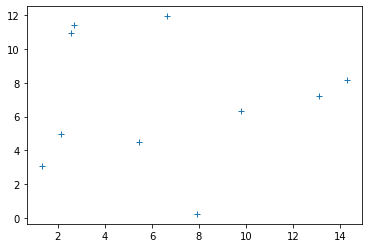

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[6.28196178]
 [9.37583962]]


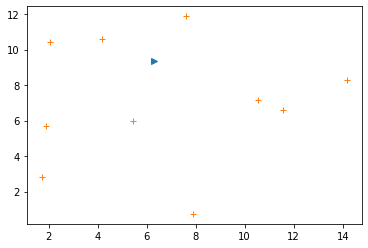

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


stable_num 0
iteration 0
targets_location is  [[6.28196178]
 [9.37583962]]


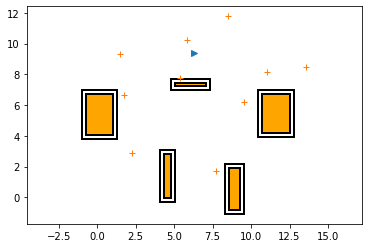

stable_num 0
iteration 1
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


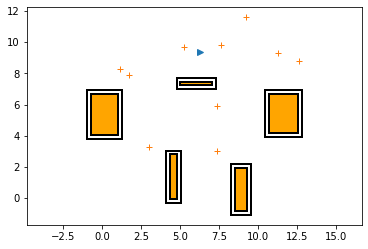

stable_num 0
iteration 2
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


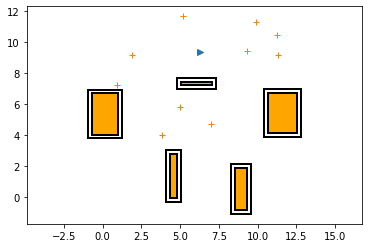

stable_num 0
iteration 3
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


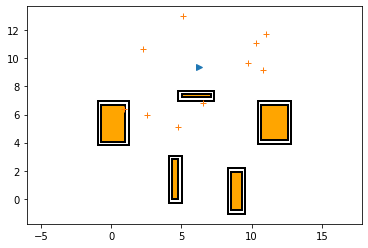

stable_num 0
iteration 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


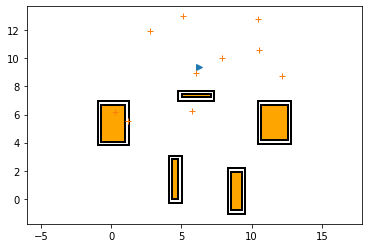

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


stable_num 0
iteration 5
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


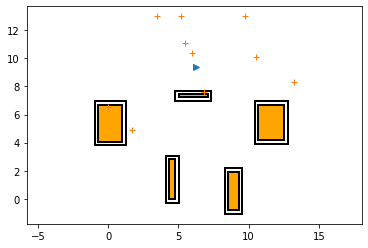

stable_num 0
iteration 6
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


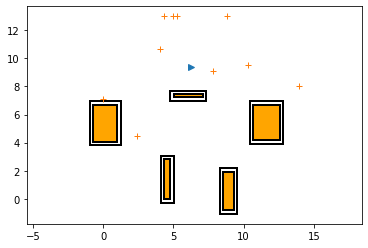

stable_num 0
iteration 7
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


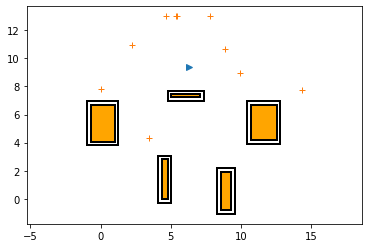

stable_num 0
iteration 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


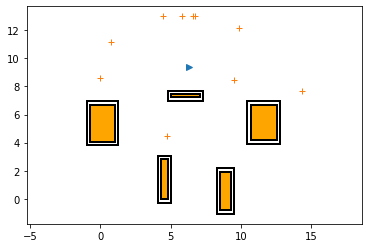

stable_num 0
iteration 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[6.28196178]
 [9.37583962]]


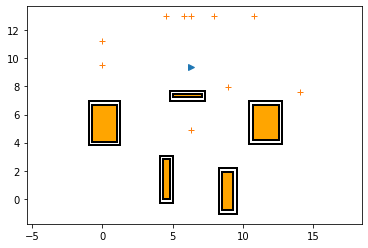

stable_num 0
iteration 10
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


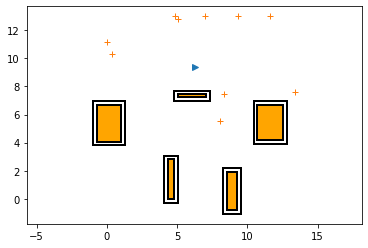

stable_num 0
iteration 11
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


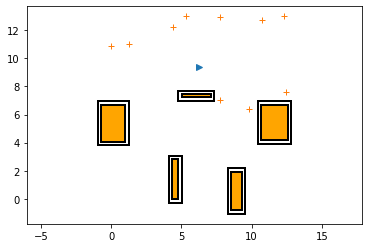

stable_num 0
iteration 12
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


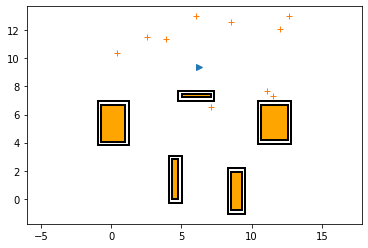

stable_num 0
iteration 13
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


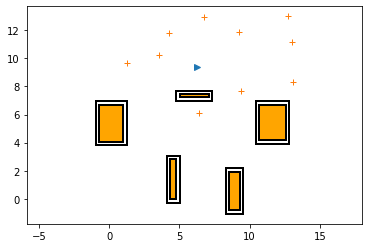

stable_num 0
iteration 14
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


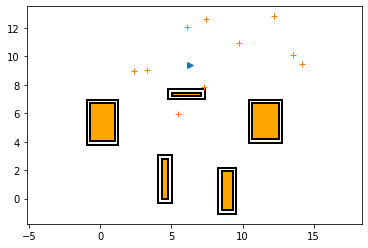

stable_num 0
iteration 15
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


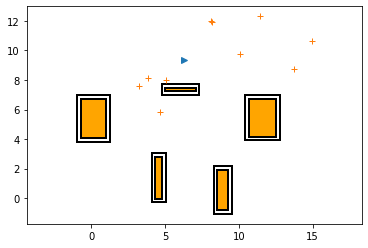

stable_num 0
iteration 16
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


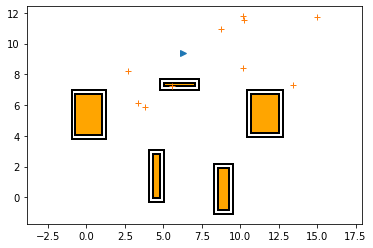

stable_num 0
iteration 17
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


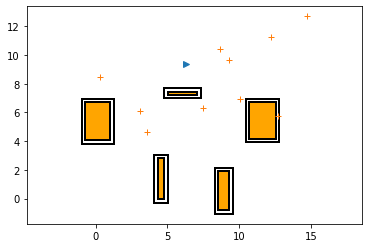

stable_num 0
iteration 18
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


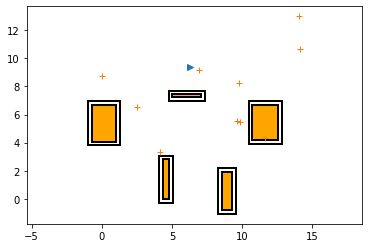

stable_num 0
iteration 19
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


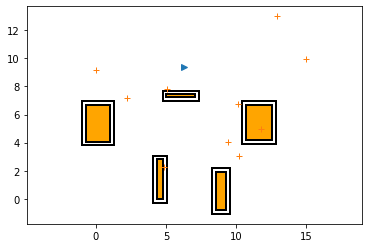

stable_num 0
iteration 20
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


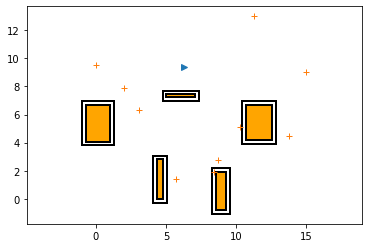

stable_num 0
iteration 21
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


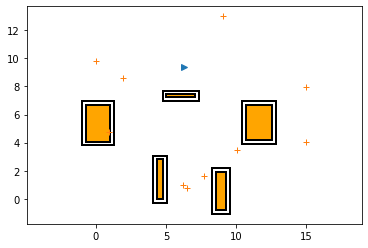

stable_num 0
iteration 22
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


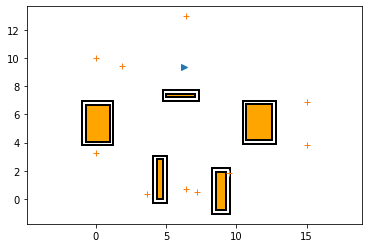

stable_num 0
iteration 23
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


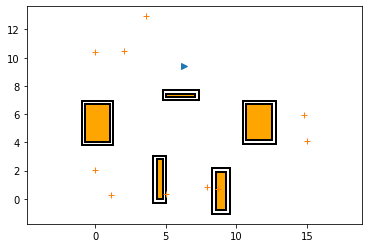

stable_num 0
iteration 24
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


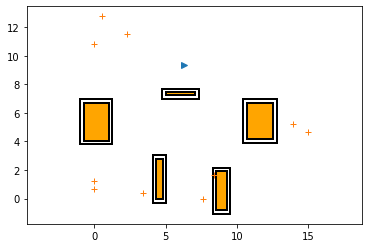

stable_num 0
iteration 25
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


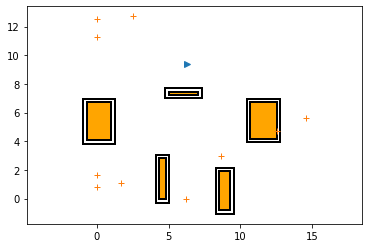

stable_num 0
iteration 26
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


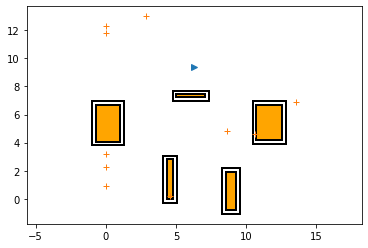

stable_num 0
iteration 27
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


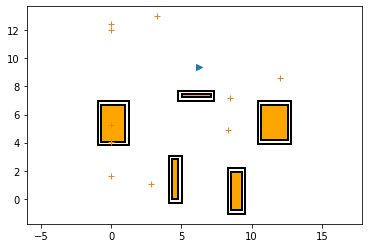

stable_num 0
iteration 28
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


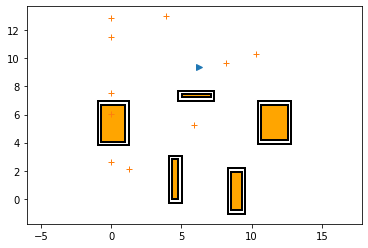

stable_num 0
iteration 29
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


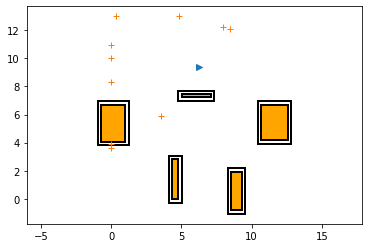

stable_num 0
iteration 30
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


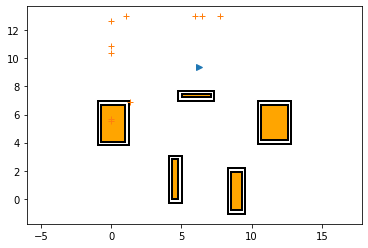

stable_num 0
iteration 31
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


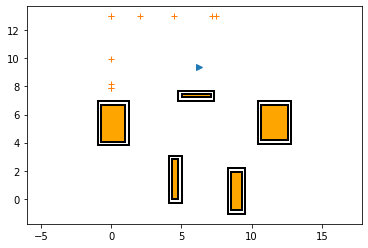

stable_num 0
iteration 32
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


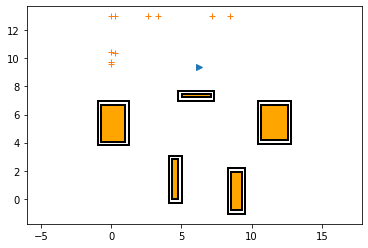

stable_num 0
iteration 33
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


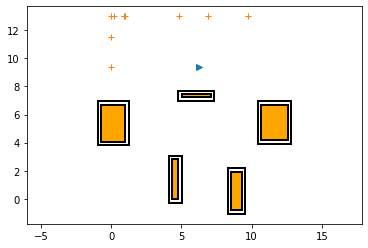

stable_num 0
iteration 34
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


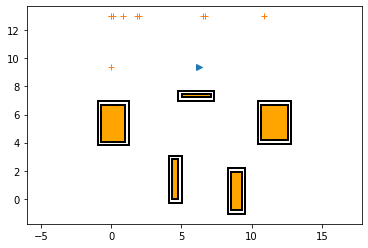

stable_num 0
iteration 35
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


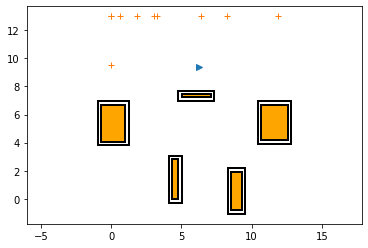

stable_num 0
iteration 36
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


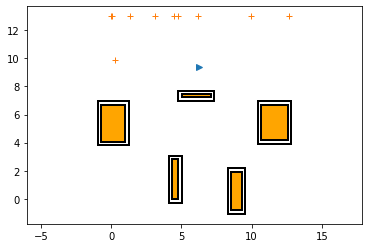

stable_num 0
iteration 37
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


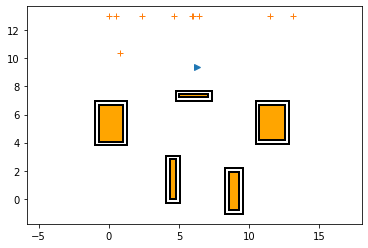

stable_num 0
iteration 38
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


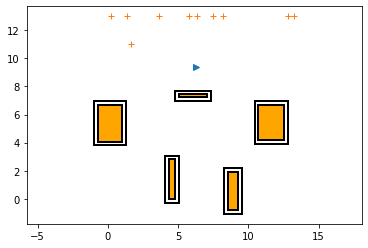

stable_num 0
iteration 39
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


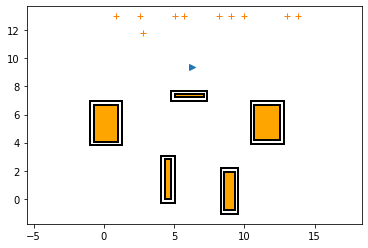

stable_num 0
iteration 40
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


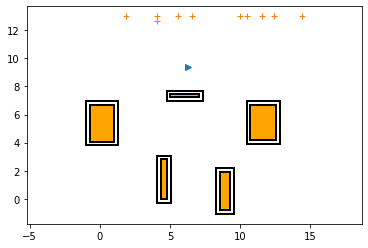

stable_num 0
iteration 41
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


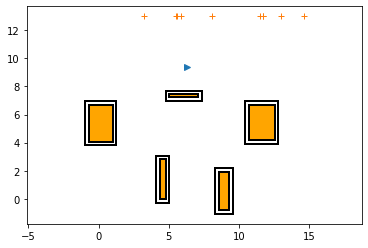

stable_num 0
iteration 42
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


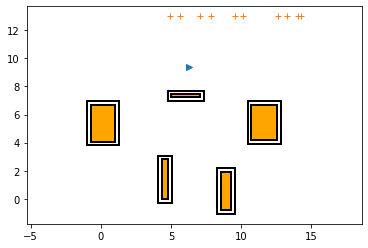

stable_num 0
iteration 43
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


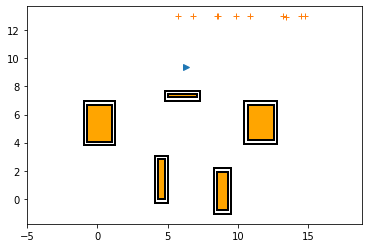

stable_num 0
iteration 44
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


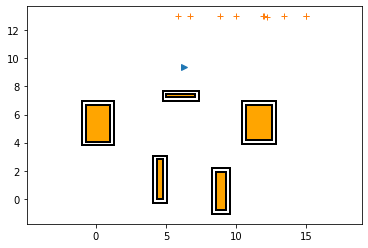

stable_num 0
iteration 45
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


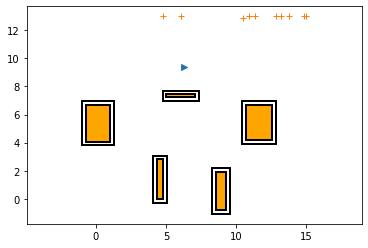

stable_num 0
iteration 46
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


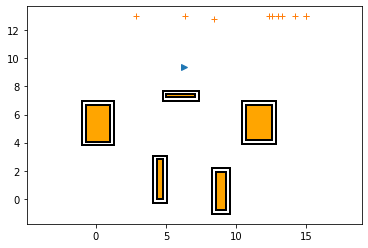

stable_num 0
iteration 47
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


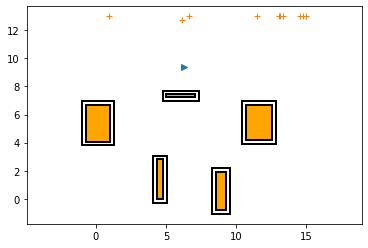

stable_num 0
iteration 48
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


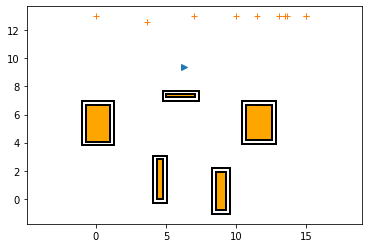

stable_num 0
iteration 49
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


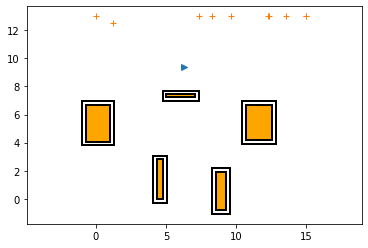

stable_num 0
iteration 50
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


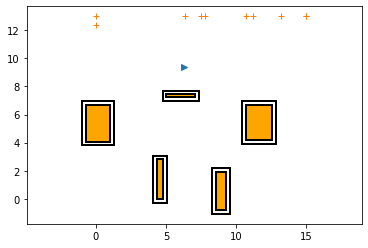

stable_num 0
iteration 51
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


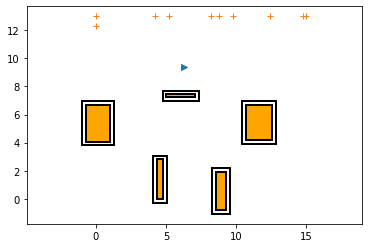

stable_num 0
iteration 52
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


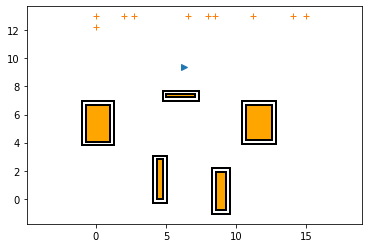

stable_num 0
iteration 53
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


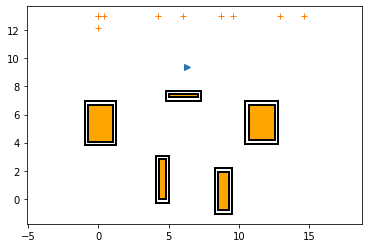

stable_num 0
iteration 54
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


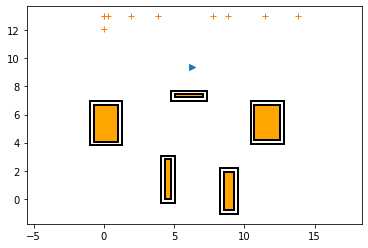

stable_num 0
iteration 55
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


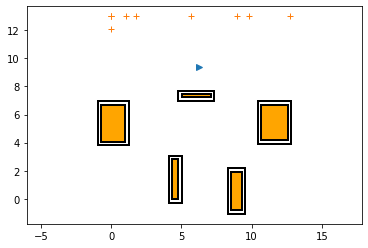

stable_num 0
iteration 56
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


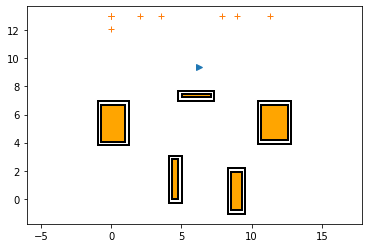

stable_num 0
iteration 57
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


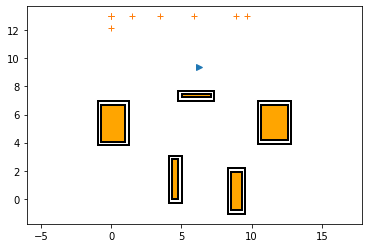

stable_num 0
iteration 58
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


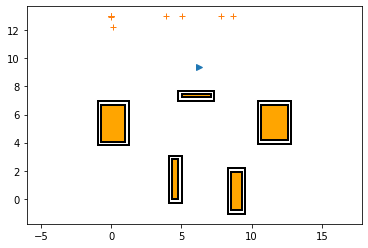

stable_num 0
iteration 59
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


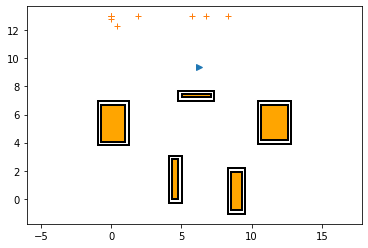

stable_num 0
iteration 60
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


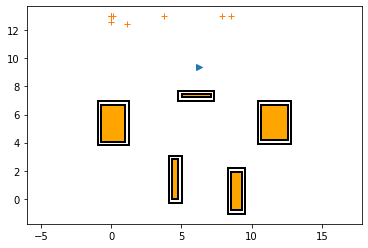

stable_num 0
iteration 61
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


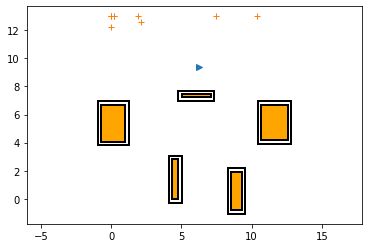

stable_num 0
iteration 62
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


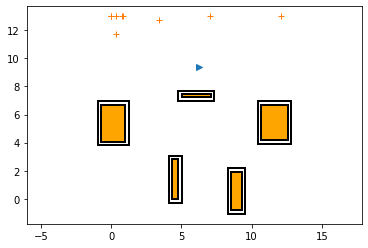

stable_num 0
iteration 63
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


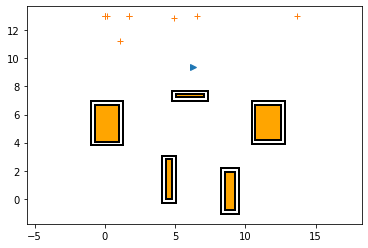

stable_num 0
iteration 64
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


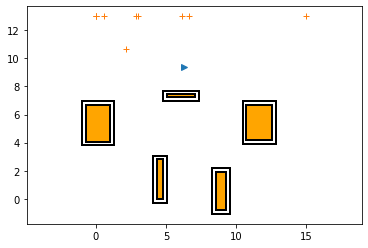

stable_num 0
iteration 65
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


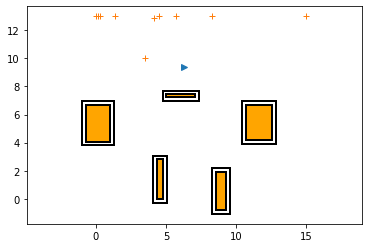

stable_num 0
iteration 66
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


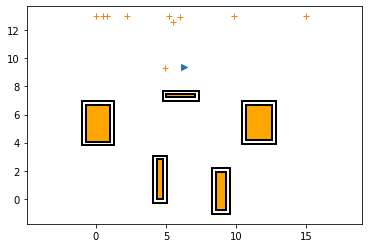

stable_num 0
iteration 67


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


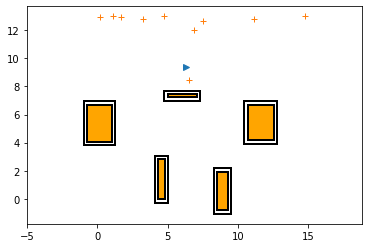

stable_num 0
iteration 68
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


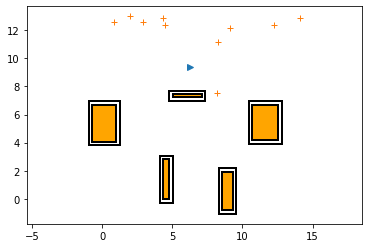

stable_num 0
iteration 69
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


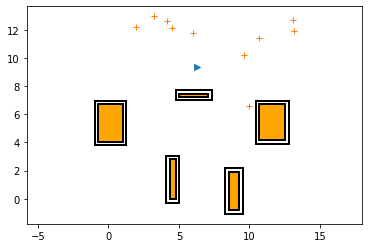

stable_num 0
iteration 70
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


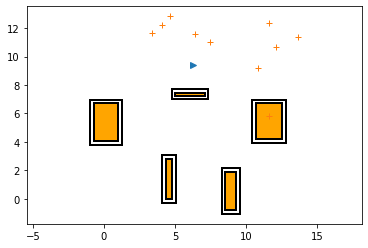

stable_num 0
iteration 71
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


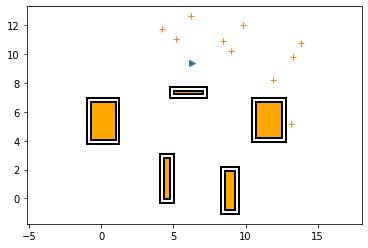

stable_num 0
iteration 72
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


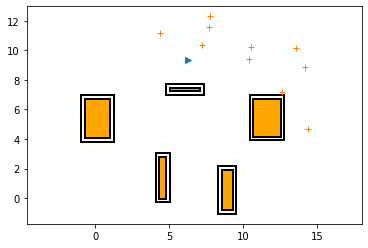

stable_num 0
iteration 73
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


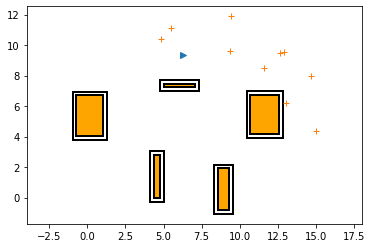

stable_num 0
iteration 74
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


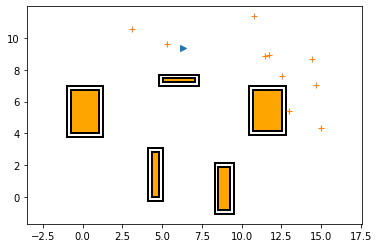

stable_num 0
iteration 75
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


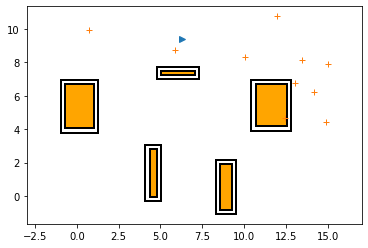

stable_num 0
iteration 76
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


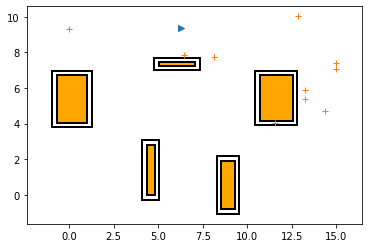

stable_num 0
iteration 77
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


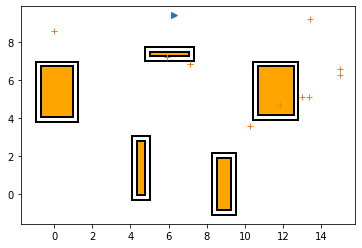

stable_num 0
iteration 78
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


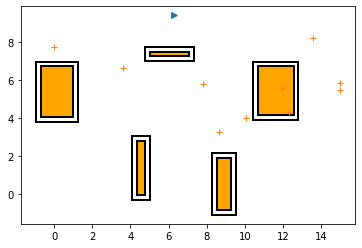

stable_num 0
iteration 79
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


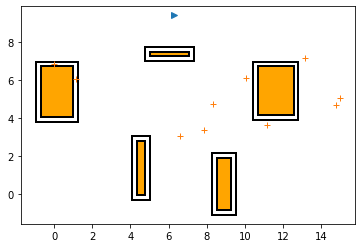

stable_num 0
iteration 80
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


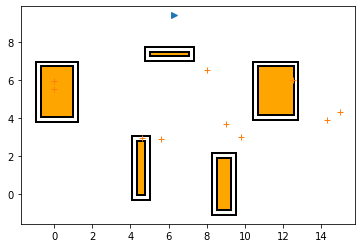

stable_num 0
iteration 81
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


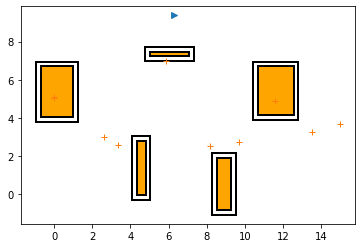

stable_num 0
iteration 82
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


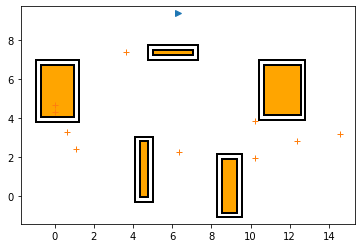

stable_num 0
iteration 83
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


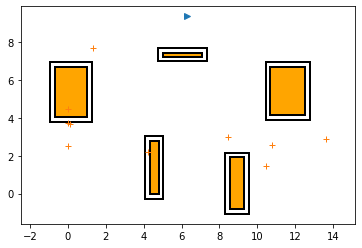

stable_num 0
iteration 84
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


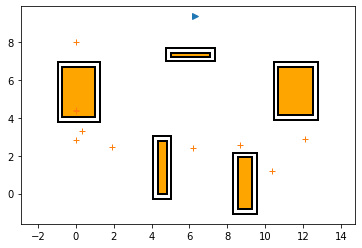

stable_num 0
iteration 85
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


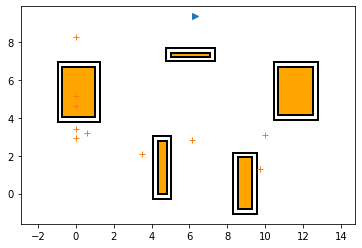

stable_num 0
iteration 86
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


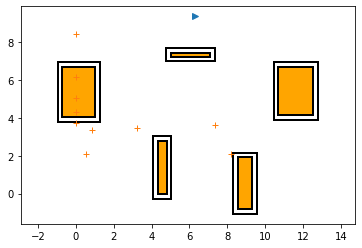

stable_num 0
iteration 87
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


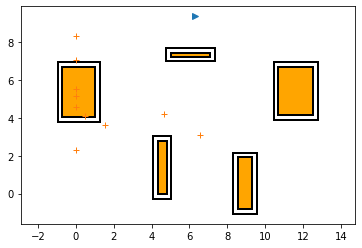

stable_num 0
iteration 88
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


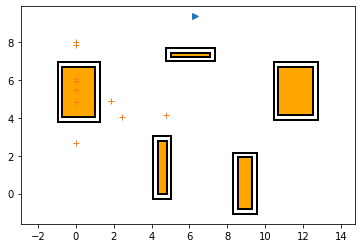

stable_num 0
iteration 89
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


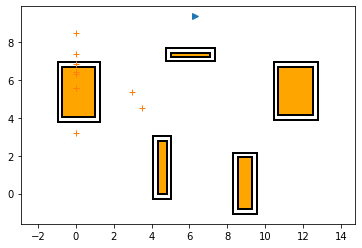

stable_num 0
iteration 90
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


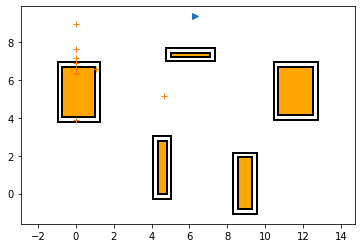

stable_num 0
iteration 91
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


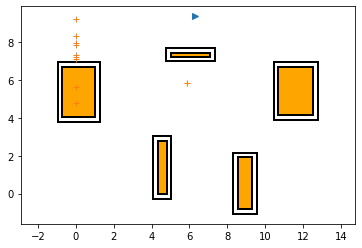

stable_num 0
iteration 92
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


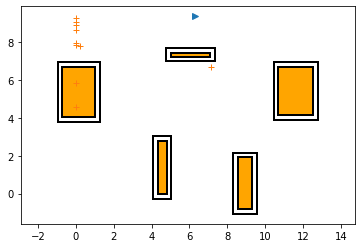

stable_num 0
iteration 93
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


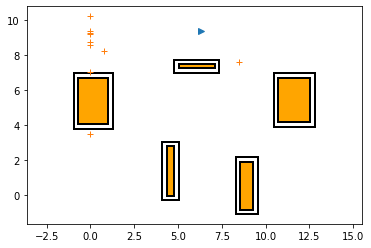

stable_num 0
iteration 94
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


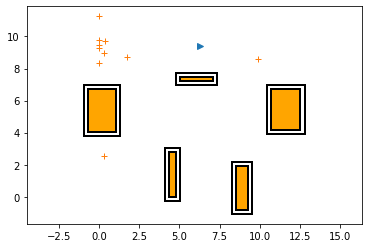

stable_num 0
iteration 95
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


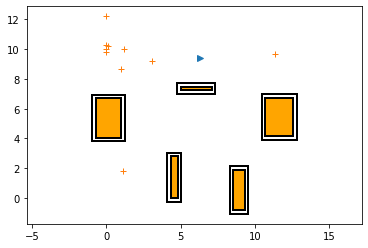

stable_num 0
iteration 96
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


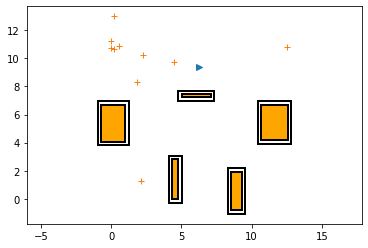

stable_num 0
iteration 97
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


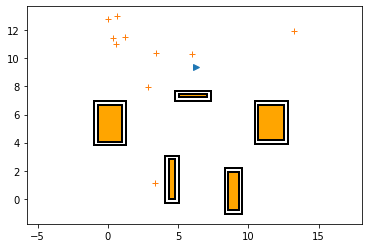

stable_num 0
iteration 98
targets_location is  [[6.28196178]
 [9.37583962]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


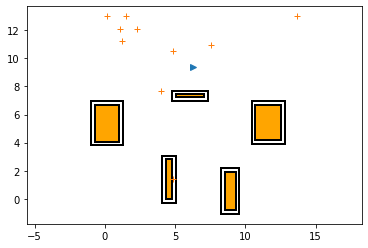

stable_num 0
iteration 99


<Figure size 432x288 with 0 Axes>

In [132]:
#def main():
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

experiment_times = 1
for epoch in range (experiment_times):
  
  generate_block()
  initiate_targets()
  plot_block(block_parameters) 
  
  plot_danger_area(block_influence_range_parameters) 
  
  last_min_value = 100
  initiate_cats(block_parameters)
  print('group',group)
  plt.plot(group[0,:],group[1,:],'+')
  stable_num = 0
  find_target = False
  success_count = 0
  iteration_list = []
  plt.show()
  for iterationn_counts in range(iteration):
    plot_block(block_parameters) 
    plot_danger_area(block_influence_range_parameters)
    
    
    for j in range(targets_num):
      plt.plot(targets_location[0][j],targets_location[1][j],'>')

    print('targets_location is ',targets_location)
    evaluate_pso()
    #print('new_group_index',new_group_index)
    particle_fly(block_parameters)
    for i in range(group_size):
      if (p_p_distance(group[0][i],group[1][i],targets_location[0][0],targets_location[1][0]) < fetch_range):
        print("FIND THE TARGET.")
        print('fetch_range',fetch_range)
        find_target = True
        iteration_list.append(iterationn_counts)
        theta = np.linspace(0, 2 * np.pi, 200)
        x = group[0][i] + fetch_range * np.cos(theta)
        y = group[1][i] + fetch_range * np.sin(theta)
        plt.plot(x,y,'r')
        break
    plt.plot(group[0,:],group[1,:],'+')
    plt.show()
    fig = plt.figure()
    if find_target:
      success_count = success_count + 1
      break
    #print("cats",cats)

    print("stable_num",stable_num)
    print("iteration",iterationn_counts)
  #if __name__ == "__main__":
  #    main()